## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [5]:
# Функция для стандартизации данных
def calc_std_feat(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [6]:
# Стандартизация данных
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = calc_std_feat(X_st[:, 1:4])

In [7]:
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [8]:
def calc_logloss(y, y_pred):
    '''Эта функция вычисляет log loss, который является мерой ошибки
        для задач бинарной классификации. Log loss выражает насколько
        хорошо модель предсказывает вероятности целевого класса. Чем
        ниже значение log loss, тем лучше. Функция принимает на вход
        истинные метки (y) и предсказанные вероятности принадлежности
        классу 1 (y_pred).'''
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

Изменили функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [9]:
# Функция для расчёта логарифмической ошибки (log loss)
def calc_logloss(y, y_pred, epsilon=1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    err = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return err

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0])
calc_logloss(y1, y_pred1)

0.05268025782891364

In [11]:
# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)

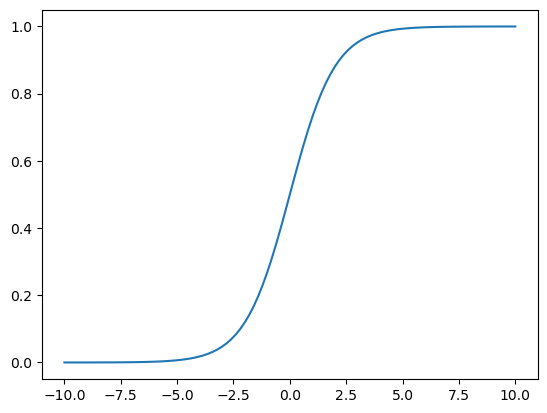

In [14]:
plt.plot(z, probabilities)
plt.show()

Оценочная модель

In [15]:
# Обучение модели
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])  # Инициализация весов
    n = X.shape[0]  # Количество образцов
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations // 10) == 0:
            print(f"Iteration {i}, Weights: {W}, Log Loss: {err}")
    final_error = calc_logloss(y, y_pred)
    return W, final_error

In [16]:
W, final_error = eval_model(X_st, y, iterations=500, eta=1)

Iteration 0, Weights: [ 0.46121499 -0.40908382  0.41426183  1.39855008], Log Loss: 0.7609587975918891
Iteration 50, Weights: [ 0.01934395 -2.22448855 -0.72422385  3.35653644], Log Loss: 0.32217454105883103
Iteration 100, Weights: [ 0.14368993 -2.72565582 -1.25084763  4.49936821], Log Loss: 0.28408280532782376
Iteration 150, Weights: [ 0.27597708 -3.04804596 -1.66406473  5.33456462], Log Loss: 0.2640618221600833
Iteration 200, Weights: [ 0.40061312 -3.30648689 -2.01135575  6.03032373], Log Loss: 0.2502359135310056
Iteration 250, Weights: [ 0.51617638 -3.53440823 -2.31584727  6.64568741], Log Loss: 0.23945830971810986
Iteration 300, Weights: [ 0.62360776 -3.7442131  -2.59040589  7.20746687], Log Loss: 0.23050076542279338
Iteration 350, Weights: [ 0.7240716  -3.94133882 -2.8427639   7.72987874], Log Loss: 0.2227713796640049
Iteration 400, Weights: [ 0.81855815 -4.12854521 -3.07782612  8.22132358], Log Loss: 0.2159428068492534
Iteration 450, Weights: [ 0.9078523  -4.30743476 -3.29885114  8

In [17]:
W

array([ 0.99091972, -4.47568728, -3.50401926,  9.12251431])

Создадим функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [18]:
# Функция для расчёта предсказанных вероятностей
def calc_pred_proba(W, X):
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [19]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([3.57112658e-01, 1.15762825e-01, 9.99548864e-01, 4.80536041e-04,
       7.43162929e-01, 2.36237496e-01, 9.99900629e-01, 9.04148728e-02,
       4.43590599e-01, 9.97259064e-01])

Создадим функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, 
и X, на выходе — массив y_pred.

In [20]:
# Функция для расчёта предсказанных классов
def calc_pred(W, X):
    '''Возвращает предсказанные классы (0 или 1)'''
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return y_pred

In [21]:
y_pred = calc_pred(W, X_st)
y_pred, y

(array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1]), array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

Посчитаем Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [22]:
# Точность
def accuracy(y, y_pred):
    accuracy = np.mean(y - y_pred)
    return 1 - accuracy

In [23]:
def confusion_matrix(y, y_pred):
    '''Матрица ошибок'''
    cm = np.zeros((2, 2))
    for i in range(len(y)): 
        if y[i] == y_pred[i] == 1: # TP
            cm[0][0] += 1
        elif y[i] == y_pred[i] == 0: # TN
            cm[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1: # FN
            cm[1][0] += 1
        elif y[i] != y_pred[i] and y[i] == 0: # FP
            cm[0][1] += 1
    return cm

In [24]:
def precision(y, y_pred):
    '''Вычисляет точность (precision) классификации'''
    cm = confusion_matrix(y, y_pred)  # Получение матрицы ошибок
    TP = cm[0][0]  # Извлечение значения TP (True Positive)
    FP = cm[0][1]  # Извлечение значения FP (False Positive)
    precision = TP / (TP + FP)  # Формула для вычисления точности
    return precision


In [25]:
def recall(y, y_pred):
    '''Вычисляет полноту (recall) классификации'''
    cm = confusion_matrix(y, y_pred)  # Получение матрицы ошибок
    TP = cm[0][0]  # Извлечение значения TP (True Positive)
    FN = cm[1][0]  # Извлечение значения FN (False Negative)
    recall = TP / (TP + FN)  # Формула для вычисления полноты
    return recall


In [26]:
def f_score(y, y_pred):
    '''Вычисляет F1-меру (F1-score) классификации'''
    pr = precision(y, y_pred)  # Вычисление точности
    rec = recall(y, y_pred)  # Вычисление полноты
    f_score = 2 * pr * rec / (pr + rec)  # Формула 
    return f_score


In [27]:
accuracy(y, y_pred)

0.9

In [28]:
precision(y, y_pred)

1.0

In [29]:
recall(y, y_pred)

0.8

In [30]:
f_score(y, y_pred)

0.888888888888889

In [31]:
confusion_matrix(y, y_pred)

array([[4., 0.],
       [1., 5.]])

Да, модель может переобучиться. Переобучение происходит, когда модель слишком точно подстраивается под тренировочные данные и начинает выучивать шум или случайности в данных, вместо того чтобы обобщать общие закономерности. Это может произойти по нескольким причинам:

Слишком сложная модель: Использование слишком сложной модели, которая имеет слишком много параметров или слоев, может привести к переобучению. Такие модели могут легко заучить тренировочные данные, вместо того чтобы выявить общие закономерности.

Маленький размер тренировочного набора: Если тренировочный набор данных слишком маленький, модель может легко выучить его исключительно из-за случайных шумов или особенностей, что приведет к переобучению.

Недостаточное регуляризация: Отсутствие или недостаточное применение методов регуляризации, таких как L1 или L2 регуляризация, может привести к переобучению, поскольку модель не будет наказываться за избыточную сложность.

Перекос в данных: Неравномерное распределение классов или наличие выбросов в данных также может привести к переобучению, поскольку модель может слишком сосредоточиться на особенностях этих выбросов или наиболее частых классах, игнорируя общие закономерности.

Неправильный выбор гиперпараметров: Неправильный выбор гиперпараметров, таких как скорость обучения, количество эпох или глубина деревьев в случае деревьев решений, также может привести к переобучению модели.

Чтобы избежать переобучения, важно следить за общими правилами машинного обучения, такими как кросс-валидация, использование валидационного набора данных, применение методов регуляризации и тщательный подбор гиперпараметров.